## Previsão de readmissão hospitalar utilizando modelo de Deep Learning

### por Antonildo Santos 

### Introdução
O objetivo desta análise é criar um modelo de Rede Neural Profunda (Deep Learning) capaz prever, com o mais alto grau de precisão possível, os atendimentos propícios a ocorrência de Readmissão Hospitalar.

### Apresentação dos dados

Para realizar este trabalho utilizei um conjunto de dados disponível publicamente no repositório da UCI [Link]( https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008# ). Este conjunto de dados representa 10 anos (1999-2008) de atendimento clínico em 130 hospitais dos EUA, contendo 101.766 observações em 10 anos. Inclui mais de 50 atributos, que representam características do paciente, diagnósticos, exames, etc. As informações foram extraídas do banco de dados contendo registros que satisfizeram os seguintes critérios. 
 
* 1) Cada atendimento representa uma internação hospitalar. 
* 2) Contempla apenas atendimentos de pacientes diabéticos, ou seja, aquele em que qualquer tipo de diabetes foi introduzido no sistema como um diagnóstico. 
* 3) O tempo de permanência foi de no mínimo 1 dia e no máximo 14 dias. 
* 4) Testes laboratoriais foram realizados durante o atendimento. 
* 5) Medicamentos foram administrados durante o atendimento.
 
Os dados contêm atributos como número do paciente, raça, gênero, idade, tipo de internação, tempo no hospital, número de exames laboratoriais realizados, resultado do exame de HbA1c, diagnósticos, número de medicamentos utilizados, se usa medicamentos para diabético e quais, número de pacientes ambulatoriais , internação e visitas de emergência no ano anterior à hospitalização, etc. Alguns desses atributos serão desconsiderados nesta análise pois não terão relevância para o objetivo do trabalho.


###  Importando bibliotecas

In [26]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import seaborn as sns  
import matplotlib as mpl
from IPython.display import Image
from sklearn.metrics import mean_squared_error
#import seaborn as sns   
import warnings

%matplotlib inline

### Carga de dados

In [27]:
# Carregando a base de dados
df_uci_diabetic = pd.read_csv('diabetic_data.csv', decimal=b',')

# Criando um novo dataframe a partir do df_uci_diabetic
df = df_uci_diabetic.copy (deep = True)

### Análise Exploratória

In [28]:
print('O Dataframe diabetic_data possui ' + str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas')

O Dataframe diabetic_data possui 101766 linhas e 50 colunas


In [29]:
# examinar os tipos de dados e estatísticas descritivas 
print (df.info ()) 
print (df.describe ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [30]:
# Visualizando as primeiras 10 linhas do dataframe
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [31]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [32]:
# Verificando a existencia de dados missing (dados faltantes)
for col in df.columns:
    if df[col].dtype == object:
        if df[col][df[col] == '?'].count() > 0:
            print(col,df[col][df[col] == '?'].count(),' Correspondendo a ',np.around((df[col][df[col] == '?'].count()/df[col].count())*100,2), '% das observações')

race 2273  Correspondendo a  2.23 % das observações
weight 98569  Correspondendo a  96.86 % das observações
payer_code 40256  Correspondendo a  39.56 % das observações
medical_specialty 49949  Correspondendo a  49.08 % das observações
diag_1 21  Correspondendo a  0.02 % das observações
diag_2 358  Correspondendo a  0.35 % das observações
diag_3 1423  Correspondendo a  1.4 % das observações


In [33]:
# Avaliando a distribuição dos dados em cada atributo
for col in df.columns:
    if df[col].dtype == object:
        if df[col][df[col] == '?'].count() != 0:       
            print(df.groupby([col])[col].count())
            print('')

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: race, dtype: int64

weight
>200             3
?            98569
[0-25)          48
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
[25-50)         97
[50-75)        897
[75-100)      1336
Name: weight, dtype: int64

payer_code
?     40256
BC     4655
CH      146
CM     1937
CP     2533
DM      549
FR        1
HM     6274
MC    32439
MD     3532
MP       79
OG     1033
OT       95
PO      592
SI       55
SP     5007
UN     2448
WC      135
Name: payer_code, dtype: int64

medical_specialty
?                                       49949
AllergyandImmunology                        7
Anesthesiology                             12
Anesthesiology-Pediatric                   19
Cardiology                               5352
Cardiology-Pediatric                        7
DCPTEAM                                  

In [34]:
# Avaliando a distribuição dos dados em cada atributo
for col in df.columns:
    if df[col].dtype == object:
        if df[col][df[col] == '?'].count() == 0:       
            print(df.groupby([col])[col].count())
            print('')

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: age, dtype: int64

max_glu_serum
>200     1485
>300     1264
None    96420
Norm     2597
Name: max_glu_serum, dtype: int64

A1Cresult
>7       3812
>8       8216
None    84748
Norm     4990
Name: A1Cresult, dtype: int64

metformin
Down        575
No        81778
Steady    18346
Up         1067
Name: metformin, dtype: int64

repaglinide
Down          45
No        100227
Steady      1384
Up           110
Name: repaglinide, dtype: int64

nateglinide
Down          11
No        101063
Steady       668
Up            24
Name: nateglinide, dtype: int64

chlorpropamide
Down           1
No        101680
Steady        79
Up             6
Name: chlorpropamide, dtype: int64

glimepiride
Down        194
N

In [35]:
# Verificando a mediana
for col in df.columns:
    if df[col].dtype != object:
        print(col, df[col].median())
        print('')

encounter_id 152388987.0

patient_nbr 45505143.0

admission_type_id 1.0

discharge_disposition_id 1.0

admission_source_id 7.0

time_in_hospital 4.0

num_lab_procedures 44.0

num_procedures 1.0

num_medications 15.0

number_outpatient 0.0

number_emergency 0.0

number_inpatient 0.0

number_diagnoses 8.0



### Limpeza e Transformação dos dados

Os critérios de eliminação de atributos e observações depende muito da interpretação dos dados feita pelo Cientista de Dados na fase de exploração. Estes critérios passam pela avaliação de cada atributo do conjunto de dados, verificação da distribuição de frequência, analise de correlações entre variáveis, modelo preditivo que será aplicado, além de um certo conhecimento do negócio em estudo, para então decidir quais a tributos e/ou observações devem ser descartados. Considerando o conjunto de dados em questão, decidi eliminar alguns atributos nos quais avalio que não impactará no resultado das análises preditivas. Descartarei os atributos "encounter_id", "patient_nbr", "weight", "payer_code", "examide", "citoglipton" e "medical_specialty". Por exemplo o atributo "weight", que corresponde ao peso do paciente, seria um atributo muito importante a ser considerado na análise, porém em 97% das observação este atributo está sem valor, tornando-se um dado insuficientemente consistente para o modelo aplicar algum tipo de generalização.

Com base na consulta a documentação disponibilizada pelo repositório dos dados e entendimento de cada atributo do conjunto de dados, decidi também eliminar algumas observações que acredito não impactar no objetivo proposta neste trabalho. Precisarei também transformar alguns dados, com o objetivo de prepará-los para serem entregue ao modelo preditivo proposto.

In [36]:
# Eliminando colunas que não serão utilizadas
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'examide', 'citoglipton', 'medical_specialty'], axis = 1, inplace = True)

#### Categorização de diagnósticos
No conjunto de dados existem três diagnosticos, um principal e dois secundários, contendo em média 752 codigos distintos em cada um, por isso resolvi realizar um reagrupamento com base numa análise realizada por Strack et al. em 2014, sobre o mesmo tema e utilizando o mesmo conjunto de dados, publicado em ( https://www.hindawi.com/journals/bmri/2014/781670/abs/ ). 

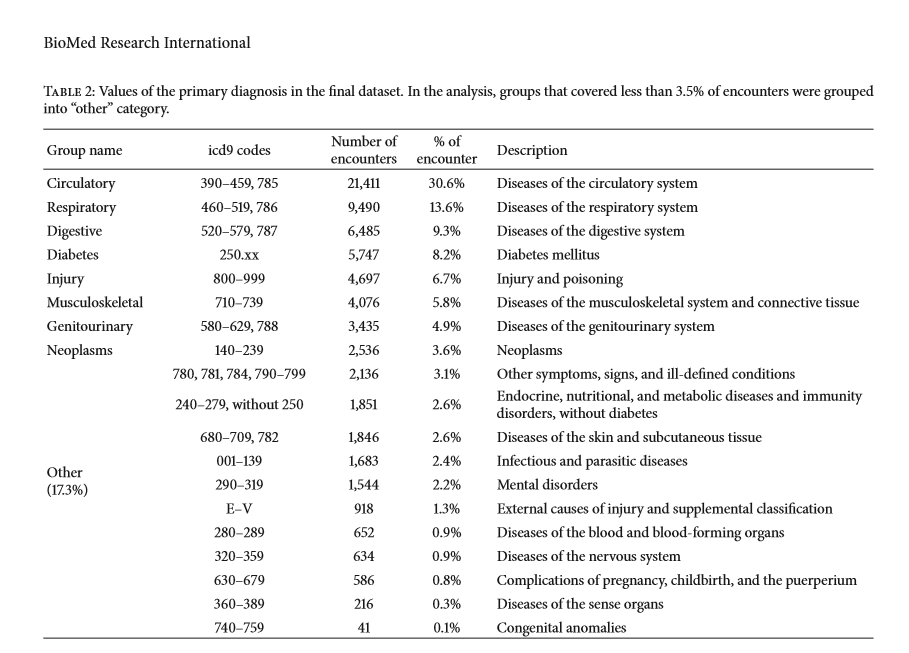

In [37]:
Image('Agrupamento_CID_9.png')

In [38]:
# Criando novas colunas para atribuir os valores transformados
df['d1'] = df['diag_1']
df['d2'] = df['diag_2']
df['d3'] = df['diag_3']
df['classe'] = -1
df['change_t'] = -1
df['gender_t'] = -1
df['diabetesMed_t'] = -1

In [39]:
# Reagrupamento do diagnóstico principal
df['d1'] = df.apply(lambda row: 1 if (row['diag_1'][0:3].zfill(3) >= '390') and (row['diag_1'][0:3].zfill(3) <= '459' ) or  (row['diag_1'][0:3].zfill(3) == '785' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 2 if (row['diag_1'][0:3].zfill(3) >= '460') and (row['diag_1'][0:3].zfill(3) <= '519' ) or  (row['diag_1'][0:3].zfill(3) == '786' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 3 if (row['diag_1'][0:3].zfill(3) >= '520') and (row['diag_1'][0:3].zfill(3) <= '579' ) or  (row['diag_1'][0:3].zfill(3) == '787' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 4 if (row['diag_1'][0:3].zfill(3) == '250') else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 5 if (row['diag_1'][0:3].zfill(3) >= '800') and (row['diag_1'][0:3].zfill(3) <= '999' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 6 if (row['diag_1'][0:3].zfill(3) >= '710') and (row['diag_1'][0:3].zfill(3) <= '739' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 7 if (row['diag_1'][0:3].zfill(3) >= '580') and (row['diag_1'][0:3].zfill(3) <= '629' ) or  (row['diag_1'][0:3].zfill(3) == '788' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 8 if (row['diag_1'][0:3].zfill(3) >= '140') and (row['diag_1'][0:3].zfill(3) <= '239' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 9 if (row['diag_1'][0:3].zfill(3) >= '790') and (row['diag_1'][0:3].zfill(3) <= '799' ) or  (row['diag_1'][0:3].zfill(3) == '780' ) or  (row['diag_1'][0:3].zfill(3) == '781' ) or  (row['diag_1'][0:3].zfill(3) == '784' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 10 if (row['diag_1'][0:3].zfill(3) >= '240') and (row['diag_1'][0:3].zfill(3) <= '249' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 10 if (row['diag_1'][0:3].zfill(3) >= '251') and (row['diag_1'][0:3].zfill(3) <= '279' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 11 if (row['diag_1'][0:3].zfill(3) >= '680') and (row['diag_1'][0:3].zfill(3) <= '709' ) or  (row['diag_1'][0:3].zfill(3) == '782' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 12 if (row['diag_1'][0:3].zfill(3) >= '001') and (row['diag_1'][0:3].zfill(3) <= '139' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '290') and (row['diag_1'][0:3].zfill(3) <= '319' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:1] >= 'E') and (row['diag_1'][0:1] <= 'V' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '280') and (row['diag_1'][0:3].zfill(3) <= '289' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '320') and (row['diag_1'][0:3].zfill(3) <= '359' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '630') and (row['diag_1'][0:3].zfill(3) <= '679' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '360') and (row['diag_1'][0:3].zfill(3) <= '389' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '740') and (row['diag_1'][0:3].zfill(3) <= '759' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 0 if (row['diag_1'][0:3].zfill(3)  == '783' or row['diag_1'][0:3].zfill(3)  == '789') else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: -1 if (row['diag_1'][0:1] == '?') else row['d1'], axis=1)                           

In [40]:
# Reagrupamento do primeiro diagnóstico secundário
df['d2'] = df.apply(lambda row: 1 if (row['diag_2'][0:3].zfill(3) >= '390') and (row['diag_2'][0:3].zfill(3) <= '459' ) or  (row['diag_2'][0:3].zfill(3) == '785' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 2 if (row['diag_2'][0:3].zfill(3) >= '460') and (row['diag_2'][0:3].zfill(3) <= '519' ) or  (row['diag_2'][0:3].zfill(3) == '786' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 3 if (row['diag_2'][0:3].zfill(3) >= '520') and (row['diag_2'][0:3].zfill(3) <= '579' ) or  (row['diag_2'][0:3].zfill(3) == '787' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 4 if (row['diag_2'][0:3].zfill(3) == '250') else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 5 if (row['diag_2'][0:3].zfill(3) >= '800') and (row['diag_2'][0:3].zfill(3) <= '999' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 6 if (row['diag_2'][0:3].zfill(3) >= '710') and (row['diag_2'][0:3].zfill(3) <= '739' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 7 if (row['diag_2'][0:3].zfill(3) >= '580') and (row['diag_2'][0:3].zfill(3) <= '629' ) or  (row['diag_2'][0:3].zfill(3) == '788' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 8 if (row['diag_2'][0:3].zfill(3) >= '140') and (row['diag_2'][0:3].zfill(3) <= '239' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 9 if (row['diag_2'][0:3].zfill(3) >= '790') and (row['diag_2'][0:3].zfill(3) <= '799' ) or  (row['diag_2'][0:3].zfill(3) == '780' ) or  (row['diag_2'][0:3].zfill(3) == '781' ) or  (row['diag_2'][0:3].zfill(3) == '784' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 10 if (row['diag_2'][0:3].zfill(3) >= '240') and (row['diag_2'][0:3].zfill(3) <= '249' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 10 if (row['diag_2'][0:3].zfill(3) >= '251') and (row['diag_2'][0:3].zfill(3) <= '279' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 11 if (row['diag_2'][0:3].zfill(3) >= '680') and (row['diag_2'][0:3].zfill(3) <= '709' ) or  (row['diag_2'][0:3].zfill(3) == '782' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 12 if (row['diag_2'][0:3].zfill(3) >= '001') and (row['diag_2'][0:3].zfill(3) <= '139' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '290') and (row['diag_2'][0:3].zfill(3) <= '319' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:1] >= 'E') and (row['diag_2'][0:1] <= 'V' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '280') and (row['diag_2'][0:3].zfill(3) <= '289' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '320') and (row['diag_2'][0:3].zfill(3) <= '359' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '630') and (row['diag_2'][0:3].zfill(3) <= '679' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '360') and (row['diag_2'][0:3].zfill(3) <= '389' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '740') and (row['diag_2'][0:3].zfill(3) <= '759' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 0 if (row['diag_2'][0:3].zfill(3)  == '783' or row['diag_2'][0:3].zfill(3)  == '789') else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: -1 if (row['diag_2'][0:1] == '?') else row['d2'], axis=1)                           

In [41]:
# Reagrupamento do segundo diagnóstico secundário
df['d3'] = df.apply(lambda row: 1 if (row['diag_3'][0:3].zfill(3) >= '390') and (row['diag_3'][0:3].zfill(3) <= '459' ) or  (row['diag_3'][0:3].zfill(3) == '785' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 2 if (row['diag_3'][0:3].zfill(3) >= '460') and (row['diag_3'][0:3].zfill(3) <= '519' ) or  (row['diag_3'][0:3].zfill(3) == '786' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 3 if (row['diag_3'][0:3].zfill(3) >= '520') and (row['diag_3'][0:3].zfill(3) <= '579' ) or  (row['diag_3'][0:3].zfill(3) == '787' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 4 if (row['diag_3'][0:3].zfill(3) == '250') else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 5 if (row['diag_3'][0:3].zfill(3) >= '800') and (row['diag_3'][0:3].zfill(3) <= '999' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 6 if (row['diag_3'][0:3].zfill(3) >= '710') and (row['diag_3'][0:3].zfill(3) <= '739' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 7 if (row['diag_3'][0:3].zfill(3) .zfill(3)>= '580') and (row['diag_3'][0:3].zfill(3) <= '629' ) or  (row['diag_3'][0:3].zfill(3) == '788' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 8 if (row['diag_3'][0:3].zfill(3) >= '140') and (row['diag_3'][0:3].zfill(3) <= '239' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 9 if (row['diag_3'][0:3].zfill(3) >= '790') and (row['diag_3'][0:3].zfill(3) <= '799' ) or  (row['diag_3'][0:3].zfill(3) == '780' ) or  (row['diag_3'][0:3].zfill(3) == '781' ) or  (row['diag_3'][0:3].zfill(3) == '784' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 10 if (row['diag_3'][0:3].zfill(3) >= '240') and (row['diag_3'][0:3].zfill(3) <= '249' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 10 if (row['diag_3'][0:3].zfill(3) >= '251') and (row['diag_3'][0:3].zfill(3) <= '279' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 11 if (row['diag_3'][0:3].zfill(3) >= '680') and (row['diag_3'][0:3].zfill(3) <= '709' ) or  (row['diag_3'][0:3].zfill(3) == '782' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 12 if (row['diag_3'][0:3].zfill(3) >= '001') and (row['diag_3'][0:3].zfill(3) <= '139' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '290') and (row['diag_3'][0:3].zfill(3) <= '319' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:1] >= 'E') and (row['diag_3'][0:1] <= 'V' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '280') and (row['diag_3'][0:3].zfill(3) <= '289' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '320') and (row['diag_3'][0:3].zfill(3) <= '359' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '630') and (row['diag_3'][0:3].zfill(3) <= '679' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '360') and (row['diag_3'][0:3].zfill(3) <= '389' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '740') and (row['diag_3'][0:3].zfill(3) <= '759' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 0 if (row['diag_3'][0:3].zfill(3)  == '783' or row['diag_3'][0:3].zfill(3)  == '789') else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: -1 if (row['diag_3'][0:1] == '?') else row['d3'], axis=1)                           

In [ ]:
print(df.groupby(['d1', 'diag_1']).d2.count())

In [ ]:
print(df.groupby(['d2', 'diag_2']).d2.count())

In [ ]:
print(df.groupby(['d3', 'diag_3']).d3.count())

Conforme consta na documentação, trata-se de um do conjunto de dados contendo atendimentos onde qualquer tipo de diabetes foi introduzido no sistema como um diagnóstico, então eliminarei as observações onde não existe nenhum diagnóstico registrado.

In [42]:
df = df[(df.d1 > -1) | (df.d2 > -1) | (df.d3 > -1)]

In [43]:
# Eliminando as colunas originais do diagnósticos
df.drop(['diag_1'], axis = 1, inplace = True)
df.drop(['diag_2'], axis = 1, inplace = True)
df.drop(['diag_3'], axis = 1, inplace = True)

### Aplicando a transformação dos dados

In [44]:
# Atribui a classe os valores 1 ou 0, correspondendo a ocorrencias de readmissão em menos de 30 dias ou não 
df['classe'] = df.apply(lambda row: 0 if (row['readmitted'][0:3] == '>30' or row['readmitted'][0:2] == 'NO') else row['classe'], axis=1) 
df['classe'] = df.apply(lambda row: 1 if (row['readmitted'][0:3] == '<30') else row['classe'], axis=1)
df.drop(['readmitted'], axis = 1, inplace = True)

In [45]:
df['change_t'] = df.apply(lambda row: 1 if (row['change'] == 'Ch') else -1, axis=1)
df['change_t'] = df.apply(lambda row: 0 if (row['change'] == 'No') else row['change_t'], axis=1)
df.drop(['change'], axis = 1, inplace = True)

In [46]:
df['gender_t'] = df.apply(lambda row: 1 if (row['gender'] == 'Male') else -1, axis=1)
df['gender_t'] = df.apply(lambda row: 0 if (row['gender'] == 'Female') else row['gender_t'], axis=1)
df.drop(['gender'], axis = 1, inplace = True)

In [47]:
df['diabetesMed_t'] = df.apply(lambda row: 1 if (row['diabetesMed'] == 'Yes') else -1, axis=1)
df['diabetesMed_t'] = df.apply(lambda row: 0 if (row['diabetesMed'] == 'No') else row['diabetesMed_t'], axis=1)
df.drop(['diabetesMed'], axis = 1, inplace = True)

In [48]:
m = 0
medicacoes = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
              'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
              'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
              'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in df.columns:
    if col in medicacoes:       
        colname = 'Med' + str(m) + '_t'
        df[colname] = df.apply(lambda row: 0 if (row[col] == 'No') else 1, axis=1)
        df.drop([col], axis = 1, inplace = True)
        m = m + 1

In [49]:
df['A1Cresult_t'] = df.apply(lambda row: 0 if (row['A1Cresult'][0:4] == 'Norm') else -1, axis=1) 
df['A1Cresult_t'] = df.apply(lambda row: 1 if (row['A1Cresult'][0:2] == '>7' or row['A1Cresult'][0:2] == '>8') else row['A1Cresult_t'], axis=1) 
df.drop(['A1Cresult'], axis = 1, inplace = True)

In [50]:
df['max_glu_serum_t'] = df.apply(lambda row: 0 if (row['max_glu_serum'][0:4] == 'Norm') else -1, axis=1) 
df['max_glu_serum_t'] = df.apply(lambda row: 1 if (row['max_glu_serum'][0:2] == '>7' or row['max_glu_serum'][0:2] == '>8') else row['max_glu_serum_t'], axis=1) 
df.drop(['max_glu_serum'], axis = 1, inplace = True)

In [51]:
df['age_faixa'] = df.apply(lambda row: 0 if (row['age'] == '[0-10)') else -1, axis=1) 
df['age_faixa'] = df.apply(lambda row: 1 if (row['age'] == '[10-20)') else row['age_faixa'], axis=1)
df['age_faixa'] = df.apply(lambda row: 2 if (row['age'] == '[20-30)') else row['age_faixa'], axis=1) 
df['age_faixa'] = df.apply(lambda row: 3 if (row['age'] == '[30-40)') else row['age_faixa'], axis=1)
df['age_faixa'] = df.apply(lambda row: 4 if (row['age'] == '[40-50)') else row['age_faixa'], axis=1) 
df['age_faixa'] = df.apply(lambda row: 5 if (row['age'] == '[50-60)') else row['age_faixa'], axis=1)
df['age_faixa'] = df.apply(lambda row: 6 if (row['age'] == '[70-80)') else row['age_faixa'], axis=1) 
df['age_faixa'] = df.apply(lambda row: 7 if (row['age'] == '[80-90)') else row['age_faixa'], axis=1)
df['age_faixa'] = df.apply(lambda row: 8 if (row['age'] == '[90-100)') else row['age_faixa'], axis=1)
df.drop(['age'], axis = 1, inplace = True)

In [52]:
df['race_t'] = df.apply(lambda row: 0 if (row['race'] == '?') else -1, axis=1) 
df['race_t'] = df.apply(lambda row: 1 if (row['race'] == 'AfricanAmerican') else row['race_t'], axis=1)
df['race_t'] = df.apply(lambda row: 2 if (row['race'] == 'Asian') else row['race_t'], axis=1) 
df['race_t'] = df.apply(lambda row: 3 if (row['race'] == 'Caucasian') else row['race_t'], axis=1)
df['race_t'] = df.apply(lambda row: 4 if (row['race'] == 'Hispanic') else row['race_t'], axis=1) 
df['race_t'] = df.apply(lambda row: 5 if (row['race'] == 'Other') else row['race_t'], axis=1)
df.drop(['race'], axis = 1, inplace = True)

In [53]:
# Salvando o dataset com as tranformações realizadas
df.to_csv('./diabetes_data_modificado.csv', index=False)

In [54]:
# Carregando a base de dados
df = pd.read_csv('diabetes_data_modificado.csv', decimal=b',')

In [55]:
df.head(10)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,Med15_t,Med16_t,Med17_t,Med18_t,Med19_t,Med20_t,A1Cresult_t,max_glu_serum_t,age_faixa,race_t
0,6,25,1,1,41,0,1,0,0,0,...,0,0,0,0,0,0,-1,-1,0,3
1,1,1,7,3,59,0,18,0,0,0,...,1,0,0,0,0,0,-1,-1,1,3
2,1,1,7,2,11,5,13,2,0,1,...,0,0,0,0,0,0,-1,-1,2,1
3,1,1,7,2,44,1,16,0,0,0,...,1,0,0,0,0,0,-1,-1,3,3
4,1,1,7,1,51,0,8,0,0,0,...,1,0,0,0,0,0,-1,-1,4,3
5,2,1,2,3,31,6,16,0,0,0,...,1,0,0,0,0,0,-1,-1,5,3
6,3,1,2,4,70,1,21,0,0,0,...,1,0,0,0,0,0,-1,-1,-1,3
7,1,1,7,5,73,0,12,0,0,0,...,0,0,0,0,0,0,-1,-1,6,3
8,2,1,4,13,68,2,28,0,0,0,...,1,0,0,0,0,0,-1,-1,7,3
9,3,3,4,12,33,3,18,0,0,0,...,1,0,0,0,0,0,-1,-1,8,3


In [56]:
print (df.info ()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101765 entries, 0 to 101764
Data columns (total 43 columns):
admission_type_id           101765 non-null int64
discharge_disposition_id    101765 non-null int64
admission_source_id         101765 non-null int64
time_in_hospital            101765 non-null int64
num_lab_procedures          101765 non-null int64
num_procedures              101765 non-null int64
num_medications             101765 non-null int64
number_outpatient           101765 non-null int64
number_emergency            101765 non-null int64
number_inpatient            101765 non-null int64
number_diagnoses            101765 non-null int64
d1                          101765 non-null int64
d2                          101765 non-null int64
d3                          101765 non-null int64
classe                      101765 non-null int64
change_t                    101765 non-null int64
gender_t                    101765 non-null int64
diabetesMed_t               101765 non-

In [57]:
print(df.groupby(['classe']).classe.count())

classe
0    90408
1    11357
Name: classe, dtype: int64


### Construção do Modelo Preditivo

O indicador de Readmissão Hospitalar  mede a taxa de pacientes que retornaram ao hospital em até 30 dias desde a última alta hospitalar correspondente a primeira admissão. Este indicador avalia a capacidade progressiva do prestador de serviço em ajudar na recuperação do paciente. Nos Estados unidos, várias iniciativas já foram tomadas para garantir o sucesso da recuperação da saúde de seus pacientes, usando técnicas de trabalho em equipe a tecnologia para diminuir a readmissão hospitalar.

A taxa de readmissão hospitalar é frequentemente usada como uma medida da qualidade assistencial de um hospital, segundo determina a ANS, o indicador de Readmissão Hospitalar é um dos critérios para o estabelecimento alcançar o reajuste de 100% do IPCA, consequentemente uma alta taxa de readmissão pode afetar o índice de reajuste dos contratos firmados entre operadoras de planos de saúde e prestadores de serviço. Segundo a diretora-adjunta de Desenvolvimento Setorial da ANS, Michelle Mello “Esse é um indicador internacional clássico para avaliação da qualidade de atendimento e cuidado prestados ao paciente nos hospitais. Quanto menor for a reincidência de internação, ou seja, quanto menor for a readmissão potencialmente evitável, melhor é considerado o atendimento prestado pela unidade hospitalar”.

Um dos grandes desafios dos hospitais é identificar as readmissões que poderiam ser evitadas. Ser capaz de prever quais pacientes serão readmitidos pode ajudar os hospitais e operadoras de plano de saúde a economizar milhões de reais e melhorar a qualidade dos cuidados e recuperação dos pacientes

O objetivo deste trabalhe é implementar um modelo de Deep Learning, capaz de classificar os pacientes que serão readmitidos, com o mais alto grau de precisão possível. Um dos desafios ao analisar este conjunto de dados é o enorme desequilíbrio da variável target: as readmissões com menos de 30 dias correspondem apenas 11,16% dos atendimentos. Nesse caso, é muito pior ter falsos negativos do que falsos positivos em nossas previsões, pois falsos negativos significam que algum paciente foi readmitido, porém o modelo não foi capaz de prever, isso poderá comprometer os idicadores de qualidade da instituição. 

In [74]:
# Pacotes de Manipulação de Dados
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Keras e TensorFlow

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
import tensorflow as tf

# Pacotes para Confusion Matrix e Balanceamento de Classes
import pandas_ml as pdml
import imblearn

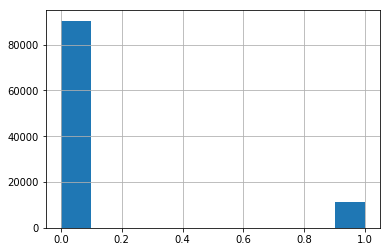

In [75]:
df['classe'].hist()
plt.show()

In [76]:
print('O Dataframe diabetic_data_modificado possui ' + str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas')

O Dataframe diabetic_data_modificado possui 101765 linhas e 43 colunas


In [77]:
frauds = df.loc[df['classe'] == 1]
non_frauds = df.loc[df['classe'] == 0]
print("Temos", len(frauds), "pontos de dados como readmissões e", len(non_frauds), "pontos de dados considerados normais.")

Temos 11357 pontos de dados como readmissões e 90408 pontos de dados considerados normais.


In [78]:
# Atribuido valores as variáveis X e y do dodelo
X = df.iloc[:,:-1]
y = df['classe']

# Gerando dados de treino, teste e validação
X1, X_valid, y1, y_valid = train_test_split(X, y.as_matrix(), test_size = 0.15, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state = 52)

In [79]:
print("Tamanho do Dataset de Treino: ", X_train.shape)

Tamanho do Dataset de Treino:  (64875, 42)


In [80]:
print("Tamanho do Dataset de Validaçao: ", X_valid.shape)

Tamanho do Dataset de Validaçao:  (15265, 42)


In [81]:
print("Tamanho do Dataset de Test: ", X_test.shape)

Tamanho do Dataset de Test:  (21625, 42)


### Começando com uma Rede Neural Simples

In [82]:
model = Sequential()
model.add(Dense(42, input_dim = 42, activation = 'relu'))     
model.add(Dense(1, activation = 'sigmoid'))                
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 43        
Total params: 1,849
Trainable params: 1,849
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(X_train.as_matrix(), y_train, epochs = 1, validation_data=(X_valid, y_valid))

Train on 64875 samples, validate on 15265 samples
Epoch 1/1
64875/64875 [==============================] - 9s 135us/step - loss: 0.1083 - acc: 0.9667 - val_loss: 0.0055 - val_acc: 1.0000


In [84]:
print("Erro/Acurácia: ", model.evaluate(X_valid.as_matrix(), y_valid, verbose = 0))

Erro/Acurácia:  [0.005527748208086666, 1.0]


In [85]:
y_predicted = model.predict(X_valid.as_matrix()).T[0].astype(int)

Confusion matrix:
Predicted      0  1  __all__
Actual                      
0          13560  0    13560
1           1705  0     1705
__all__    15265  0    15265


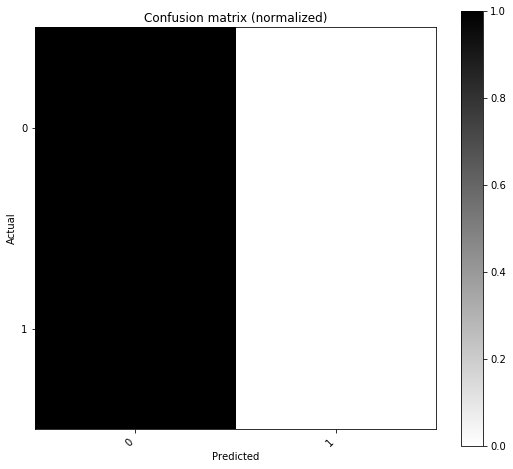

Confusion Matrix:

Predicted      0  1  __all__
Actual                      
0          13560  0    13560
1           1705  0     1705
__all__    15265  0    15265


Overall Statistics:

Accuracy: 0.8883065836881756
95% CI: (0.883202818959111, 0.8932618369543117)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       0         1
Population                                15265     15265
P: Condition positive                     13560      1705
N: Condition negative                      1705     13560
Test outcome positive                     15265         0
Test outcome negative                         0     15265
TP: True Positive                         13560         0
TN: True Negative                             0     13560
FP: False Positive                         1705         0
FN: False Negative                            0      1705
TPR: (Sensitivity, hit rate, recall)        

In [86]:
from pandas_ml import ConfusionMatrix
import warnings
warnings.filterwarnings('ignore')
y_right = np.array(y_valid)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

Podemos observar que apesar do modelo está demonstrando uma acurácia de aproximadamente 88%, analisando a ConfusionMatrix percebemos que os resultados não foram satisfatório, consequencia do desbalanciamento dos dados. Então vamos aplicar um oversampling para corrigir um viés no conjunto de dados original, empregando Synthetic Minority Over-sampling Technique para balancear os dados. 

### Aplicando Scala, Oversampling e Redução de dimensionalidade com PCA

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, Normalizer, StandardScaler, MaxAbsScaler, RobustScaler

data = scale(X)
df2 = pdml.ModelFrame(data, target=y)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
X2, y2 = oversampled.iloc[:,:-1], oversampled['classe']
X2
data = scale(X2)
pca = PCA(n_components = 10)
X2 = pca.fit_transform(data)
X2

array([[-4.05683369, -1.03067925, -0.19960957, ...,  1.21280239,
         0.66216688, -0.7316472 ],
       [ 0.44572987, -1.22896425,  0.34493854, ...,  0.6787189 ,
         0.40898263,  0.30181776],
       [-1.6002958 , -1.19012577,  0.36799959, ..., -0.4734077 ,
        -1.80687454, -0.48125437],
       ...,
       [ 1.06194305,  1.4817377 ,  0.81009563, ...,  0.29022578,
         0.12365166, -0.49848571],
       [-3.03711598,  1.33683873,  0.61968092, ...,  0.08706353,
        -0.06841811, -0.42772297],
       [ 2.63322245,  1.39551869, -1.21790417, ...,  0.88425602,
        -0.17018624, -0.2059454 ]])

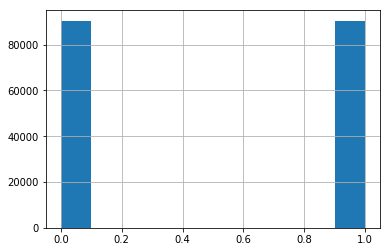

In [88]:
oversampled['classe'].hist()
plt.show()

In [89]:
# Gerando dados de treino, teste e validação
X3, X2_valid, y3, y2_valid = train_test_split(X2, y2.as_matrix(), test_size = 0.15)
X2_train, X2_test, y2_train, y2_test = train_test_split(X3, y3, test_size = 0.25)

### Aumentando o Número de Camadas na Rede Neural

In [90]:
model2 = Sequential()
model2.add(Dense(10, input_dim = 10, activation = 'tanh')) 
model2.add(Dense(27, activation = 'tanh'))
model2.add(Dense(16, activation = 'tanh'))
model2.add(Dense(2, activation = 'tanh'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = "Adam", metrics = ['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 27)                297       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                448       
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 3         
Total params: 892
Trainable params: 892
Non-trainable params: 0
_________________________________________________________________


In [91]:
history = model2.fit(X2_train, y2_train, epochs = 2, validation_data=(X2_valid, y2_valid))

Train on 115269 samples, validate on 27123 samples
Epoch 1/2
115269/115269 [==============================] - 18s 157us/step - loss: 0.1106 - acc: 0.9947 - val_loss: 0.0172 - val_acc: 0.9999
Epoch 2/2
115269/115269 [==============================] - 18s 157us/step - loss: 0.0080 - acc: 0.9998 - val_loss: 0.0029 - val_acc: 1.0000


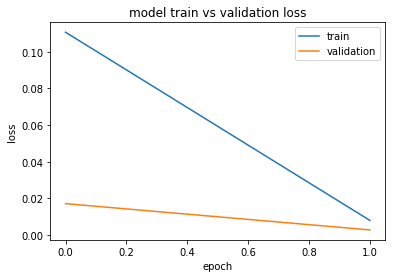

In [92]:
# Avaliando o Modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss'), 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [93]:
print("Loss: ", model2.evaluate(X2_valid, y2_valid, verbose=0))

Loss:  [0.002868062082778481, 0.9999631309220957]


In [94]:
y2_predicted = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y2_test)

In [95]:
np.setdiff1d(y2_predicted, y2_correct)

array([], dtype=float32)

In [96]:
false_neg = 0
false_pos = 0
incorrect = 0
total = len(y2_test)
for i in range(len(y2_test)):
    if y2_predicted[i] != y2_correct[i]:
        incorrect += 1
        if y2_correct[i] == 1 and y2_predicted[i] == 0:
            false_neg += 1
        else:
            false_pos += 1

inaccuracy = incorrect / total

print('Inacurácia:', inaccuracy)
print('Acurácia:', 1 - inaccuracy)
if incorrect > 0:
    print('Taxa de Falsos Negativos:', false_neg/incorrect)
    print('Taxa de Falsos Positivos:', false_pos / incorrect )    
print('Falsos Negativos/total:', false_neg/total)

Inacurácia: 0.0001561524047470331
Acurácia: 0.999843847595253
Taxa de Falsos Negativos: 0.16666666666666666
Taxa de Falsos Positivos: 0.8333333333333334
Falsos Negativos/total: 2.6025400791172185e-05


In [97]:
print(incorrect)

6


Confusion matrix:
Predicted  False   True  __all__
Actual                          
False      19228      5    19233
True           1  19190    19191
__all__    19229  19195    38424


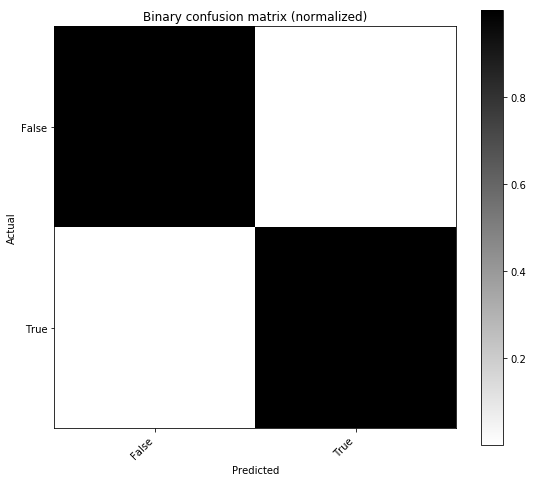

population: 38424
P: 19191
N: 19233
PositiveTest: 19195
NegativeTest: 19229
TP: 19190
TN: 19228
FP: 5
FN: 1
TPR: 0.9999478922411547
TNR: 0.9997400301565018
PPV: 0.9997395154988278
NPV: 0.9999479952155599
FPR: 0.0002599698434981542
FDR: 0.00026048450117218026
FNR: 5.2107758845292065e-05
ACC: 0.999843847595253
F1_score: 0.9998436930130777
MCC: 0.9996877165560009
informedness: 0.9996879223976565
markedness: 0.9996875107143877
prevalence: 0.4994534665833854
LRP: 3846.3995622948255
LRN: 5.2121308813787304e-05
DOR: 73797064.0
FOR: 5.2004784440168494e-05


In [99]:
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()

### Conclusão
O modelo de Deep Learning conseguiu atingir um excelente índice de acurácia com um alto grau de precisão, demonstrando ser uma ferramenta eficaz na identificação antecipada de pacientes que necessitarão de uma maior atenção da equipe assistencial, por possuir uma alta probabilidade de ocorrência de readmissão.



#### Referencias

Data Science Acabemy: Formação Inteligencia Artificial           
https://www.datascienceacademy.com.br/pages/formacao-inteligencia-artificial

Fator de Qualidade: dados de readmissão hospitalar devem ser informados à ANS   
http://www.ans.gov.br/aans/noticias-ans/qualidade-da-saude/3167-fator-de-qualidade-dados-de-readmissao-hospitalar-devem-ser-informados-a-ans

3 formas únicas de diminuir a readmissão hospitalar       
https://saudebusiness.com/noticias/3-formas-diminuir-readmissao-hospitalar/
